Accuracy: 0.9998

Classification Report:
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    154283
      Benign       1.00      1.00      1.00    362015

    accuracy                           1.00    516298
   macro avg       1.00      1.00      1.00    516298
weighted avg       1.00      1.00      1.00    516298



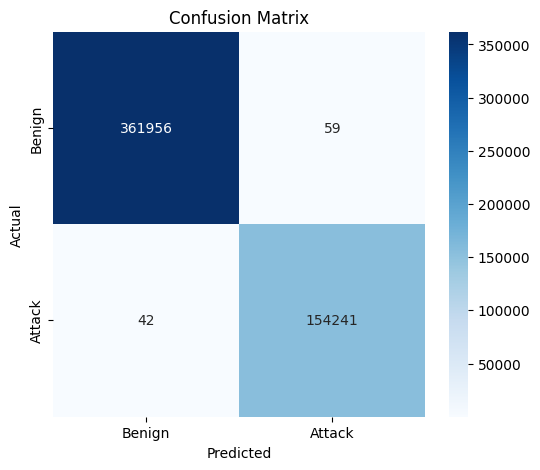

Model saved as new_model.joblib and features saved as model_features.joblib


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load cleaned datasets
tuesday = pd.read_csv('tuesday_plus_cleaned.csv')
wednesday = pd.read_csv('wednesday_plus_cleaned.csv')
thursday = pd.read_csv('thursday_plus_cleaned.csv')
friday = pd.read_csv('friday_plus_cleaned.csv')

# Combine datasets
combined_df = pd.concat([tuesday, wednesday, thursday, friday], ignore_index=True)

# Columns to keep
selected_columns = [
    'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
    'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Fwd IAT Mean', 'Bwd IAT Mean',
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
    'ACK Flag Count', 'URG Flag Count', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
    'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg',
    'Bwd Segment Size Avg', 'Protocol', 'Src Port', 'Dst Port', 'Label'
]

combined_df = combined_df[selected_columns]
combined_df.dropna(inplace=True)

# Normalize labels
combined_df['Label'] = combined_df['Label'].str.upper()
combined_df['Label'] = combined_df['Label'].apply(lambda x: 'Benign' if x == 'BENIGN' else 'Attack')

X = combined_df.drop('Label', axis=1)
y = combined_df['Label']

groups = np.arange(len(X))

gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Use class_weight balanced
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['Benign', 'Attack'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Save the model and feature names
joblib.dump(model, "new_model.joblib")
joblib.dump(list(X.columns), "model_features.joblib")
print("Model saved as new_model.joblib and features saved as model_features.joblib")




In [18]:
print(df['Label'].value_counts())


Label
Benign    1206738
Attack     514253
Name: count, dtype: int64


In [19]:
import pandas as pd
import numpy as np
import json

# List your cleaned CSV files here
files = [
    'tuesday_plus_cleaned.csv',
    'wednesday_plus_cleaned.csv',
    'thursday_plus_cleaned.csv',
    'friday_plus_cleaned.csv'
]

# Columns you used in model (features only, exclude Label)
features = [
    'Flow Duration',
    'Total Fwd Packet',
    'Total Bwd packets',
    'Total Length of Fwd Packet',
    'Total Length of Bwd Packet',
    'Fwd Packet Length Mean',
    'Bwd Packet Length Mean',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Flow IAT Mean',
    'Fwd IAT Mean',
    'Bwd IAT Mean',
    'FIN Flag Count',
    'SYN Flag Count',
    'RST Flag Count',
    'PSH Flag Count',
    'ACK Flag Count',
    'URG Flag Count',
    'FWD Init Win Bytes',
    'Bwd Init Win Bytes',
    'Down/Up Ratio',
    'Average Packet Size',
    'Fwd Segment Size Avg',
    'Bwd Segment Size Avg',
    'Protocol',
    'Src Port',
    'Dst Port'
]

# Combine data from all files
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs, ignore_index=True)

# Keep only needed features
df = df[features]

# Replace infinite or invalid values with NaN, then fill NaN with 0 or median
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# Collect min and max per feature
feature_ranges = {}
for col in features:
    min_val = df[col].min()
    max_val = df[col].max()
    # Convert to native Python float for JSON compatibility
    feature_ranges[col] = (float(min_val), float(max_val))

# Save to JSON file
with open('feature_ranges.json', 'w') as f:
    json.dump(feature_ranges, f, indent=2)

print("Feature ranges saved to feature_ranges.json")


Feature ranges saved to feature_ranges.json


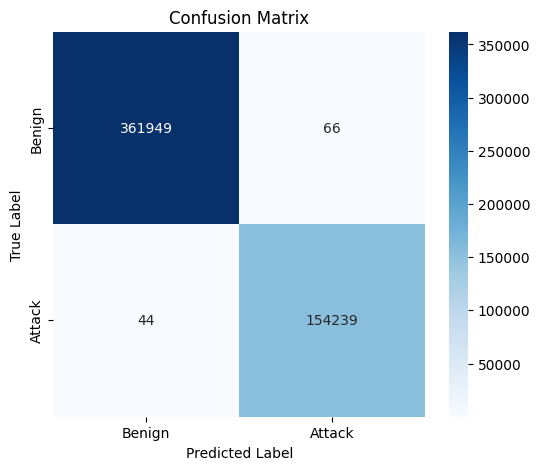

Confusion Matrix:
[[361949     66]
 [    44 154239]]


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred, labels=['Benign', 'Attack'])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:")
print(cm)


In [5]:
import joblib

joblib.dump(model, 'new_model.joblib')
print("✅ Model saved as final_model.joblib")




✅ Model saved as final_model.joblib


In [17]:
import pandas as pd
import numpy as np
import joblib
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# ----------------------
# 1. Load your test dataset
# ----------------------
df_test = pd.read_csv('tuesday_plus_cleaned.csv')

# Apply same preprocessing as during training:
df_test['Label'] = df_test['Label'].str.upper()
df_test['Label'] = df_test['Label'].apply(lambda x: 'Benign' if x == 'BENIGN' else 'Attack')

# Separate features and labels
y_test = df_test['Label']
X_test = df_test.drop(columns=['Label'])

# ----------------------
# 2. Load your trained models
# ----------------------
model1 = joblib.load('random_forest_model.joblib')  # model with full feature set
model2 = joblib.load('new_model.joblib')            # model with smaller feature set

# ----------------------
# 3. Define helper to align features
# ----------------------
def align_features(X, feature_names):
    """
    Ensure X has all columns from feature_names.
    Adds missing columns with zero, reorders columns exactly.
    """
    X_copy = X.copy()
    missing = [col for col in feature_names if col not in X_copy.columns]
    for col in missing:
        X_copy[col] = 0
    return X_copy[feature_names]

# ----------------------
# 4. Prepare test sets for each model
# ----------------------
X_test_model1 = align_features(X_test, model1.feature_names_in_)
X_test_model2 = align_features(X_test, model2.feature_names_in_)

# ----------------------
# 5. Encode true labels for numeric comparison
# ----------------------
le = LabelEncoder()
le.fit(y_test)
y_test_enc = le.transform(y_test)

# ----------------------
# 6. Evaluate Model 1
# ----------------------
start = time.time()
y_pred1 = model1.predict(X_test_model1)
time1 = time.time() - start

# If model predicts strings, encode them
if isinstance(y_pred1[0], str):
    y_pred1_enc = le.transform(y_pred1)
else:
    y_pred1_enc = y_pred1

print("=== Model 1 (Full Feature Set) ===")
print("Accuracy:", round(accuracy_score(y_test_enc, y_pred1_enc), 4))
print("Time to predict:", round(time1, 4), "s")
print(classification_report(y_test_enc, y_pred1_enc, target_names=le.classes_))

# ----------------------
# 7. Evaluate Model 2
# ----------------------
start = time.time()
y_pred2 = model2.predict(X_test_model2)
time2 = time.time() - start

if isinstance(y_pred2[0], str):
    y_pred2_enc = le.transform(y_pred2)
else:
    y_pred2_enc = y_pred2

print("\n=== Model 2 (Smaller Feature Set) ===")
print("Accuracy:", round(accuracy_score(y_test_enc, y_pred2_enc), 4))
print("Time to predict:", round(time2, 4), "s")
print(classification_report(y_test_enc, y_pred2_enc, target_names=le.classes_))

# ----------------------
# 8. Summary Comparison
# ----------------------
print("\n=== Summary Comparison ===")
print(f"Model 1 – Accuracy: {accuracy_score(y_test_enc, y_pred1_enc):.4f}, Predict Time: {time1:.4f}s")
print(f"Model 2 – Accuracy: {accuracy_score(y_test_enc, y_pred2_enc):.4f}, Predict Time: {time2:.4f}s")





=== Model 1 (Full Feature Set) ===
Accuracy: 1.0
Time to predict: 0.9944 s
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      6972
      Benign       1.00      1.00      1.00    314071

    accuracy                           1.00    321043
   macro avg       1.00      1.00      1.00    321043
weighted avg       1.00      1.00      1.00    321043


=== Model 2 (Smaller Feature Set) ===
Accuracy: 1.0
Time to predict: 0.7823 s
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      6972
      Benign       1.00      1.00      1.00    314071

    accuracy                           1.00    321043
   macro avg       1.00      1.00      1.00    321043
weighted avg       1.00      1.00      1.00    321043


=== Summary Comparison ===
Model 1 – Accuracy: 1.0000, Predict Time: 0.9944s
Model 2 – Accuracy: 1.0000, Predict Time: 0.7823s


In [7]:
import pandas as pd

# List your CSV files here
files = [
    'tuesday_plus_cleaned.csv',
    'wednesday_plus_cleaned.csv',
    'thursday_plus_cleaned.csv',
    'friday_plus_cleaned.csv'
]

# Read and concatenate
df_list = [pd.read_csv(file) for file in files]
combined_df = pd.concat(df_list, ignore_index=True)

print(f"Combined data shape: {combined_df.shape}")






Combined data shape: (1720991, 96)


In [21]:
import pandas as pd
import json

# List all your cleaned CSV files here
files = [
    'tuesday_plus_cleaned.csv',
    'wednesday_plus_cleaned.csv',
    'thursday_plus_cleaned.csv',
    'friday_plus_cleaned.csv'
]

# Load and combine all data
df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

# Drop columns that are not numeric or useful
# For example, drop 'Label' or any categorical columns you don’t want to analyze here
df = df.select_dtypes(include=['number'])  # select only numeric columns

# Get min and max for each feature
feature_ranges = {}
for col in df.columns:
    min_val = df[col].min()
    max_val = df[col].max()
    feature_ranges[col] = (float(min_val), float(max_val))

# Save to JSON
with open("feature_ranges.json", "w") as f:
    json.dump(feature_ranges, f, indent=2)

print("Feature ranges saved to feature_ranges.json")


Feature ranges saved to feature_ranges.json


In [22]:
import pandas as pd
import os

# List of cleaned CSV files
files = [
    "tuesday_plus_cleaned.csv",
    "wednesday_plus_cleaned.csv",
    "thursday_plus_cleaned.csv",
    "friday_plus_cleaned.csv"
]

attack_samples = []

for file in files:
    if os.path.exists(file):
        print(f"Loading {file}")
        df = pd.read_csv(file)
        df['Label'] = df['Label'].str.upper()
        df['Label'] = df['Label'].apply(lambda x: 'Benign' if x == 'BENIGN' else 'Attack')
        attack_df = df[df['Label'] == 'Attack'].drop(columns=['Label'])
        attack_samples.append(attack_df)
    else:
        print(f"⚠️ File not found: {file}")

# Combine all attack samples into one DataFrame
if attack_samples:
    combined_attacks = pd.concat(attack_samples, ignore_index=True)
    sampled_attacks = combined_attacks.sample(n=1000, random_state=42)  # Adjust `n` as needed
    sampled_attacks.to_csv("attack_samples.csv", index=False)
    print("✅ Saved 1000 attack samples to 'attack_samples.csv'")
else:
    print("❌ No valid files found or no attack samples.")


Loading tuesday_plus_cleaned.csv
Loading wednesday_plus_cleaned.csv
Loading thursday_plus_cleaned.csv
Loading friday_plus_cleaned.csv
✅ Saved 1000 attack samples to 'attack_samples.csv'
